<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset2080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [3]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/Pneumonia/')
print(pneumonia_data)
print(len(pneumonia_data))

print ('\n')
tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia/')
print(tidakPneumonia_data)
print(len(tidakPneumonia_data))

['person276_bacteria_1296.jpeg', 'person281_bacteria_1329.jpeg', 'person319_bacteria_1476.jpeg', 'person306_bacteria_1439.jpeg', 'person296_bacteria_1395.jpeg', 'person278_bacteria_1311.jpeg', 'person308_bacteria_1443.jpeg', 'person290_virus_594.jpeg', 'person281_bacteria_1325.jpeg', 'person307_bacteria_1441.jpeg', 'person302_bacteria_1430.jpeg', 'person294_bacteria_1381.jpeg', 'person299_bacteria_1417.jpeg', 'person301_bacteria_1427.jpeg', 'person277_bacteria_1305.jpeg', 'person297_bacteria_1400.jpeg', 'person309_virus_632.jpeg', 'person287_bacteria_1355.jpeg', 'person292_virus_602.jpeg', 'person281_bacteria_1333.jpeg', 'person306_virus_628.jpeg', 'person307_virus_629.jpeg', 'person317_virus_643.jpeg', 'person318_bacteria_1474.jpeg', 'person296_virus_613.jpeg', 'person277_virus_571.jpeg', 'person311_virus_634.jpeg', 'person281_bacteria_1332.jpeg', 'person287_bacteria_1354.jpeg', 'person273_virus_561.jpeg', 'person286_virus_585.jpeg', 'person277_bacteria_1304.jpeg', 'person305_bacteria

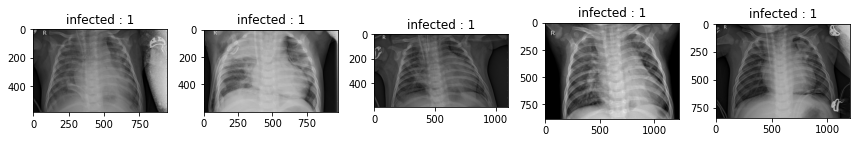

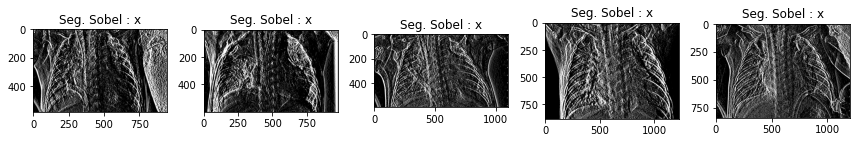

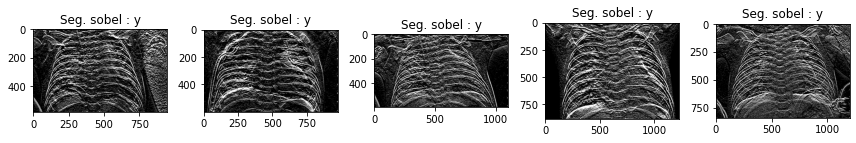

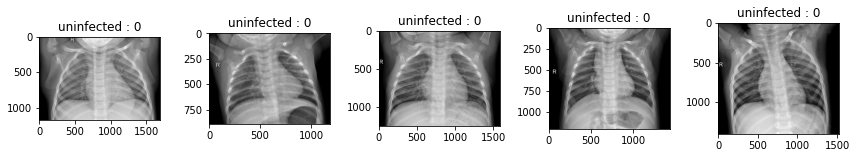

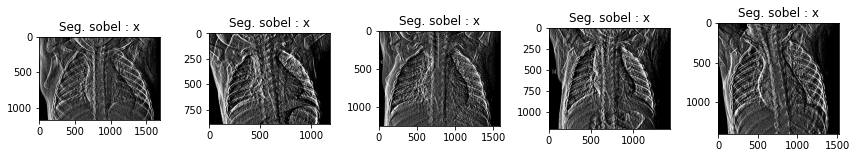

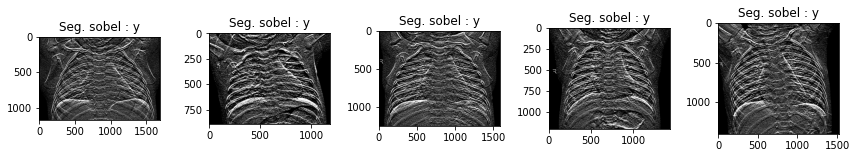

In [0]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi


plt.figure(figsize = (12,12)) #mengatur skala citra yg ditmpilkan
for i in range(5):            #melakukan perulangan sbnyk 5X (dgn nilai awal i=0)
    plt.subplot(1, 5, i+1)    #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img)           #plot citra sesuai ketmpt yg disediakan baris ke2
    plt.title('infected : 1') #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()        #tampilannya disesuaikan dgn lebar layar

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur(gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,1,0, ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Sobel : x')
    plt.tight_layout()

plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  #img = cv2.GaussianBlur(gray, (3,3), 0)
  edges = cv2.Sobel (img, cv2.CV_8U,0,1, ksize=5)
  plt.imshow(edges, cmap="gray")
  plt.title ('Seg. sobel : y')
  plt.tight_layout()


#Tahap Visualisasi Citra Tidak Pneumonia

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,1,0,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,0,1,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:
#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(10): #(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Pneumonia' + "/" + pneumonia_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range (10): #(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA2080/Data2080_8ux.csv", x, fmt='%s',delimiter=',' )

In [6]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA2080/Data2080_8ux.csv')
print (len(dataset))
print (dataset)

20
          H1            H2            H3  ...            H6            H7  Actual
0   0.003205  2.834708e-06  2.961562e-10  ... -2.683524e-14  8.832718e-21     1.0
1   0.003585  3.776584e-06  1.528002e-09  ...  3.168377e-12 -3.695763e-19     1.0
2   0.002964  1.894881e-06  3.393996e-10  ...  5.151974e-13  1.209539e-20     1.0
3   0.002294  1.963443e-07  1.182975e-10  ...  4.787797e-14  3.323955e-21     1.0
4   0.002748  8.516543e-07  3.122128e-10  ...  1.158912e-13 -3.421623e-21     1.0
5   0.002994  1.123639e-06  8.510286e-10  ...  4.880447e-13 -3.576065e-19     1.0
6   0.002570  6.854186e-07  5.163652e-10  ...  1.409754e-13 -3.423954e-20     1.0
7   0.003026  3.814636e-09  2.396615e-10  ... -1.044382e-15 -7.528139e-22     1.0
8   0.003338  1.678665e-06  1.831414e-09  ...  2.297908e-12 -6.198496e-19     1.0
9   0.002680  1.792010e-06  3.495293e-10  ...  4.508253e-13 -1.867951e-20     1.0
10  0.002501  5.468532e-07  4.631308e-11  ...  5.438132e-14 -1.357336e-21     0.0
11  0.002322 

In [7]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X)
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

18
2
18
2
20


,H1,H2,H3,H4,H5,H6,H7
0,0.003205,2.834708e-06,2.961562e-10,6.411431e-11,-1.881504e-22,-2.683524e-14,8.832718e-21
1,0.003585,3.776584e-06,1.528002e-09,1.686400e-09,2.681744e-18,3.168377e-12,-3.695763e-19
2,0.002964,1.894881e-06,3.393996e-10,3.761306e-10,1.338435e-19,5.151974e-13,1.209539e-20
3,0.002294,1.963443e-07,1.182975e-10,1.335742e-10,1.645852e-20,4.787797e-14,3.323955e-21
4,0.002748,8.516543e-07,3.122128e-10,1.258177e-10,2.470077e-20,1.158912e-13,-3.421623e-21
5,0.002994,1.123639e-06,8.510286e-10,7.607759e-10,4.968341e-19,4.880447e-13,-3.576065e-19
6,0.002570,6.854186e-07,5.163652e-10,2.436378e-10,7.934371e-20,1.409754e-13,-3.423954e-20
7,0.003026,3.814636e-09,2.396615e-10,1.722974e-11,8.118578e-22,-1.044382e-15,-7.528139e-22
8,0.003338,1.678665e-06,1.831414e-09,1.919029e-09,3.543822e-18,2.297908e-12,-6.198496e-19
9,0.002680,1.792010e-06,3.495293e-10,3.393046e-10,1.153467e-19,4.508253e-13,-1.867951e-20


0.0    527
1.0    143
Name: Actual, dtype: int64
0.0    273
1.0     57
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

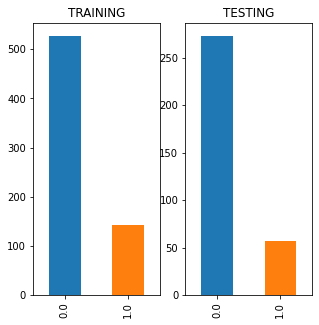

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,5)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(1,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(1,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[ 0.03116511, -0.41361609, -0.26229831, ..., -0.06131905,
        -0.13550164,  0.13161878],
       [-0.10310097, -0.33627669, -0.2787436 , ..., -0.06111316,
        -0.128276  ,  0.13570145],
       [ 3.84906978,  4.70250468,  0.50463578, ..., -0.02256542,
         0.41057878, -0.21194008],
       ...,
       [-0.34645765, -0.22578943, -0.26186481, ..., -0.06125274,
        -0.13337546,  0.13323625],
       [-0.33045794, -0.39042545, -0.09839929, ..., -0.06114952,
        -0.1377495 ,  0.13245528],
       [-1.03473707, -0.28649826, -0.17380434, ..., -0.06136335,
        -0.14002251,  0.13461747]])

In [0]:
math.sqrt(len(y_train))

25.88435821108957

In [0]:
akurasi = 0
for x in range(2,len(y_train)): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 17
[[267   6]
 [ 23  34]]
Akurasi : 0.9121212121212121
presisi : [0.92068966 0.85      ]
recall : [0.97802198 0.59649123]
F-Score : [0.94849023 0.70103093]
--------------------------------------------


In [0]:
akurasi = 0
for x in range(2,len(y_train)): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='manhattan')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 7
[[263  10]
 [ 19  38]]
Akurasi : 0.9121212121212121
presisi : [0.93262411 0.79166667]
recall : [0.96336996 0.66666667]
F-Score : [0.94774775 0.72380952]
--------------------------------------------
